<a href="https://colab.research.google.com/github/x3gan/OSPF-Implementation-In-Python/blob/main/Deep%20Network%20Development/Linear_Regression_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression**

<div style="border: 3px solid #222; padding: 16px; border-radius: 10px; background-color: #1c1f26; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #e0e0e0;">
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 12px;">
    <span style="font-size: 24px; color: #ff5555;">&#128274;</span>
    <span style="font-size: 16px;"><strong>Project:</strong> Linear Regression</span>
  </div>
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 8px;">
    <span style="font-size: 20px; color: #ff5555;">&#128218;</span>
    <span style="font-size: 16px;"><strong>Course:</strong> Deep Network Development</span>
  </div>
  <div style="margin-top: 12px; font-size: 14px;">
    <span style="font-size: 18px; color: #6e8192;">&#128100;</span>
    <span style="font-weight: bold;"><strong>Authors:</strong></span> Tamás Takács, Imre Molnár (PhD students, Department of Artificial Intelligence, Eötvös Loránd University)
  </div>
</div>
<hr style="border: none; border-top: 2px solid #444;">
<br>

<img src="https://i.ibb.co/zHt41h6g/o8ianibn-2-6-1-1-1.png" alt="o8ianibn-2-6-1-1-1" border="0">

Linear regression is a method for `modeling the relationship between a dependent variable` and one or more independent variables by fitting a straight line to the observed data. It is commonly used to predict outcomes and understand how changes in one variable affect another, making it a simple yet powerful tool for data analysis.

In this example, we continue following Tim and Tom's journey as we estimate their life expectancy using two distinct approaches. The first method employs a closed-form solution based on the Moore-Penrose pseudoinverse—a technique rooted in linear algebra—while the second ustilizes a neural network to capture more complex, non-linear relationships in the data.

In [ ]:
# @title Roadmap Generator
%%capture flowchart_output
from graphviz import Digraph

def create_linear_regression_flowchart(output_filename='linear_regression_flowchart'):
    dot = Digraph(name='LinearRegression', format='png')
    dot.attr(rankdir='LR')
    dot.attr('node', shape='box', style='filled', fontsize='12', fontname='Arial')

    # Define nodes with difficulties (green: easy, yellow: moderate, red: difficult)
    dot.node('Data', 'Read & Explore Data\n(Easy)', fillcolor='#A0E7A0')
    dot.node('Preprocess', 'Data Cleaning & Preprocessing\n(Moderate)', fillcolor='#F6D49A')
    dot.node('Corr', 'Correlation Analysis & Heatmap\n(Easy)', fillcolor='#A0E7A0')
    dot.node('SingleReg', 'Single Variable Regression\n(using Normal Equation)\n(Moderate)', fillcolor='#F6D49A')
    dot.node('MultiReg', 'Multiple Regression\n(using Closed-Form)\n(Moderate)', fillcolor='#F6D49A')
    dot.node('NNReg', 'Neural Network Regression\n(Difficult)', fillcolor='#F6A0A0')
    dot.node('Predict', 'Evaluation & Prediction\n(Easy)', fillcolor='#A0E7A0')

    # Define sequential connections
    dot.edge('Data', 'Preprocess')
    dot.edge('Preprocess', 'Corr')
    dot.edge('Corr', 'SingleReg')
    dot.edge('SingleReg', 'MultiReg')
    dot.edge('MultiReg', 'NNReg')
    dot.edge('NNReg', 'Predict')

    dot.render(output_filename, view=False)

create_linear_regression_flowchart('linear_regression_flowchart')


## **Necessary Imports**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from IPython.display import Image as IMG

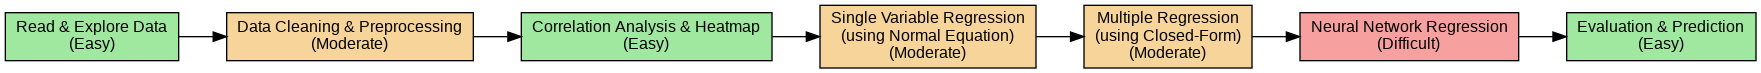

In [ ]:
IMG('linear_regression_flowchart.png')

## **Reading the Data**

In [ ]:
life_exp = pd.read_csv('../data/LifeExpectancyData.csv')

## **Exploring the Data**

In [ ]:
life_exp.shape

(2938, 22)

In [ ]:
life_exp.head() #shows first 5 elements

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
life_exp.info() #gives information about the fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
life_exp.describe()

## **Data Preprocessing**

In [ ]:
life_exp.drop(columns=['Country', 'Status'], inplace=True)

In [ ]:
#Change column names for conveniency
life_exp.rename(columns = {" BMI " :"BMI",
  "Life expectancy ": "Life_expectancy",
  "Adult Mortality":"Adult_mortality",
  "infant deaths":"Infant_deaths",
  "percentage expenditure":"Percentage_expenditure",
  "Hepatitis B":"HepatitisB",
  "Measles ":"Measles",
  "under-five deaths ": "Under_five_deaths",
  "Total expenditure":"Total_expenditure",
  "Diphtheria ": "Diphtheria",
  " thinness 1–19 years":"Thinness_1–19_years",
  " thinness 5–9 years":"Thinness_5–9_years",
  " HIV/AIDS":"HIV/AIDS",
  "Income composition of resources":
  "Income_composition_of_resources"}, inplace = True)

## **Correlation Hearmap**

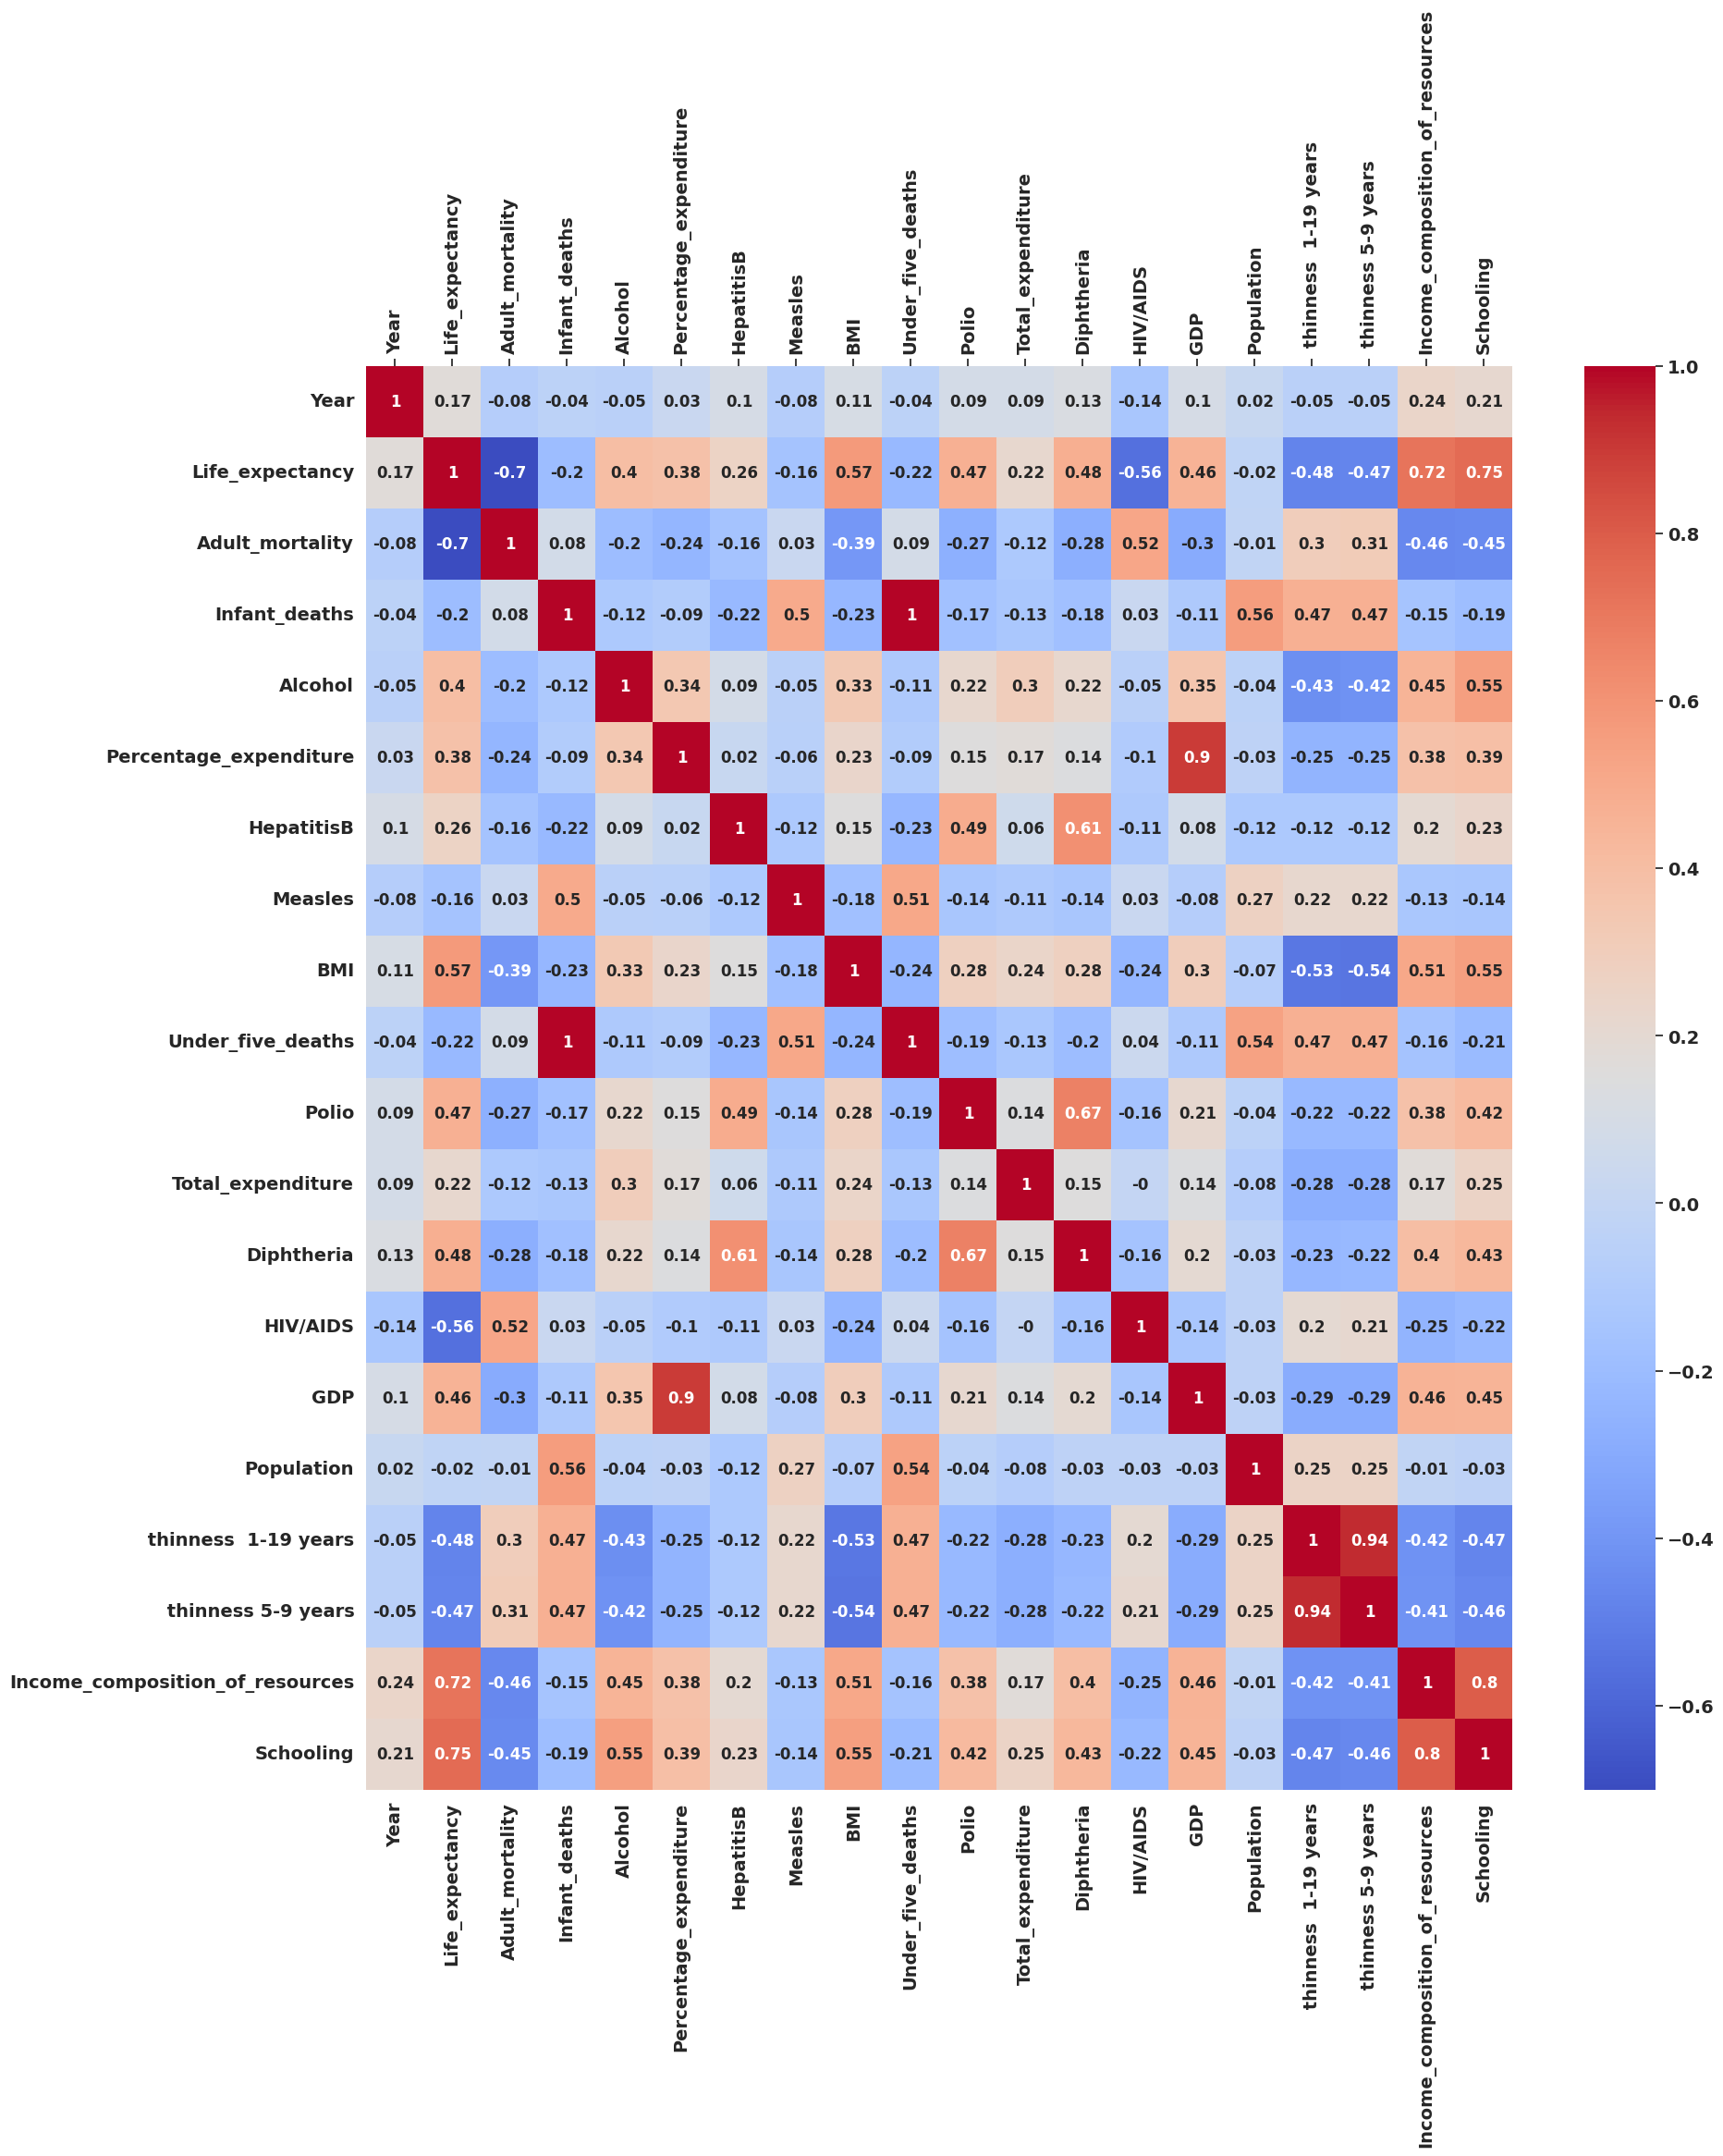

In [ ]:
sns.set(rc = {'figure.figsize':(20,20), 'font.weight': 'bold', 'font.size': 12, 'xtick.labelsize': 14, 'ytick.labelsize': 14, 'xtick.top': True, 'xtick.labeltop': True})
ax = sns.heatmap(life_exp.corr().round(2), annot=True, cmap="coolwarm") #visualizing the correlation between the variables (how do they influence each other)
plt.savefig('corr.png', bbox_inches='tight')

## **Handling data**

In [ ]:
X = life_exp
Y = life_exp["Life_expectancy"]

In [ ]:
X.head()

In [ ]:
Y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life_expectancy, dtype: float64

## **Handling missing values**

In [ ]:
X.isnull().sum() #alias for isna -- checks the number of empty, nan, nat, ... elements

Year                                 0
Life_expectancy                     10
Adult_mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [ ]:
#There are many ways to fill missing values: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
def fillmissing(df, feature, method):
  if method == "mode":
    df[feature] = df[feature].fillna(df[feature].mode()[0])
  elif method == "median":
    df[feature] = df[feature].fillna(df[feature].median())
  else:
    df[feature] = df[feature].fillna(df[feature].mean())

#We'll use the mean value
features_missing = X.columns[X.isna().any()]
for feature in features_missing:
  fillmissing(X, feature= feature, method= "mean")

#for Y we'll use the median value
Y.fillna(Y.median(), inplace=True)

In [ ]:
Y = np.array(Y)

In [ ]:
X.isnull().sum() #no more missing values

Year                               0
Life_expectancy                    0
Adult_mortality                    0
Infant_deaths                      0
Alcohol                            0
Percentage_expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

# **Linear Regression**

**x** - data \
**y** - label

If we have **n** datapoints, then our data and label matrix will look like this.

$ \underset{{({{n,}}2)}}{x}=\begin{bmatrix}{1} & x^{\left(1\right)}\\ \begin{matrix}{\begin{matrix}{1}\\ ...\end{matrix}}\\ 1\end{matrix} & \begin{matrix}{\begin{matrix}{x^{\left(2\right)}}\\ ...\end{matrix}}\\ x^{\left(n\right)}\end{matrix}\end{bmatrix}, \underset{{\left(n,1\right)}}{y}=\begin{bmatrix}{y^{\left(1\right)}}\\ \begin{matrix}{\begin{matrix}{y^{\left(2\right)}}\\ ...\end{matrix}}\\ y^{\left(n\right)}\end{matrix}\end{bmatrix} $

We want to find $ \underset{{(2,1)}}{\theta}=\begin{bmatrix}{\theta_0}\\ \theta_1\end{bmatrix} $ for $ h(x) = \hat{y} = \theta x $

If we substitute our ***x*** and $\mathit{\mathbf{\theta}}$ in our hypothesis function we will get:

$ h(x)=\begin{bmatrix}{1^{}\cdot\theta_0}+x^{\left(1\right)}\theta_1\\ \begin{matrix}{\begin{matrix}{{1^{}\cdot\theta_0}+x^{\left(2\right)}\theta_1}\\ ...\end{matrix}}\\ {1^{}\cdot\theta_0}+x^{\left(200\right)}\theta_1\end{matrix}\end{bmatrix} $

In case of linear regression we can use the ***Normal Equation*** to calculate the optimal theta

$ \theta^*= (X^TX)^{-1}(X^TY) $

# **Linear Regression with Tim**

In [ ]:
tim_data = X['BMI']
tim_data.head()

0    19.1
1    18.6
2    18.1
3    17.6
4    17.2
Name: BMI, dtype: float64

### **Visualizing Life expectancy vs BMI plot**

Text(0, 0.5, 'Life Expectency')

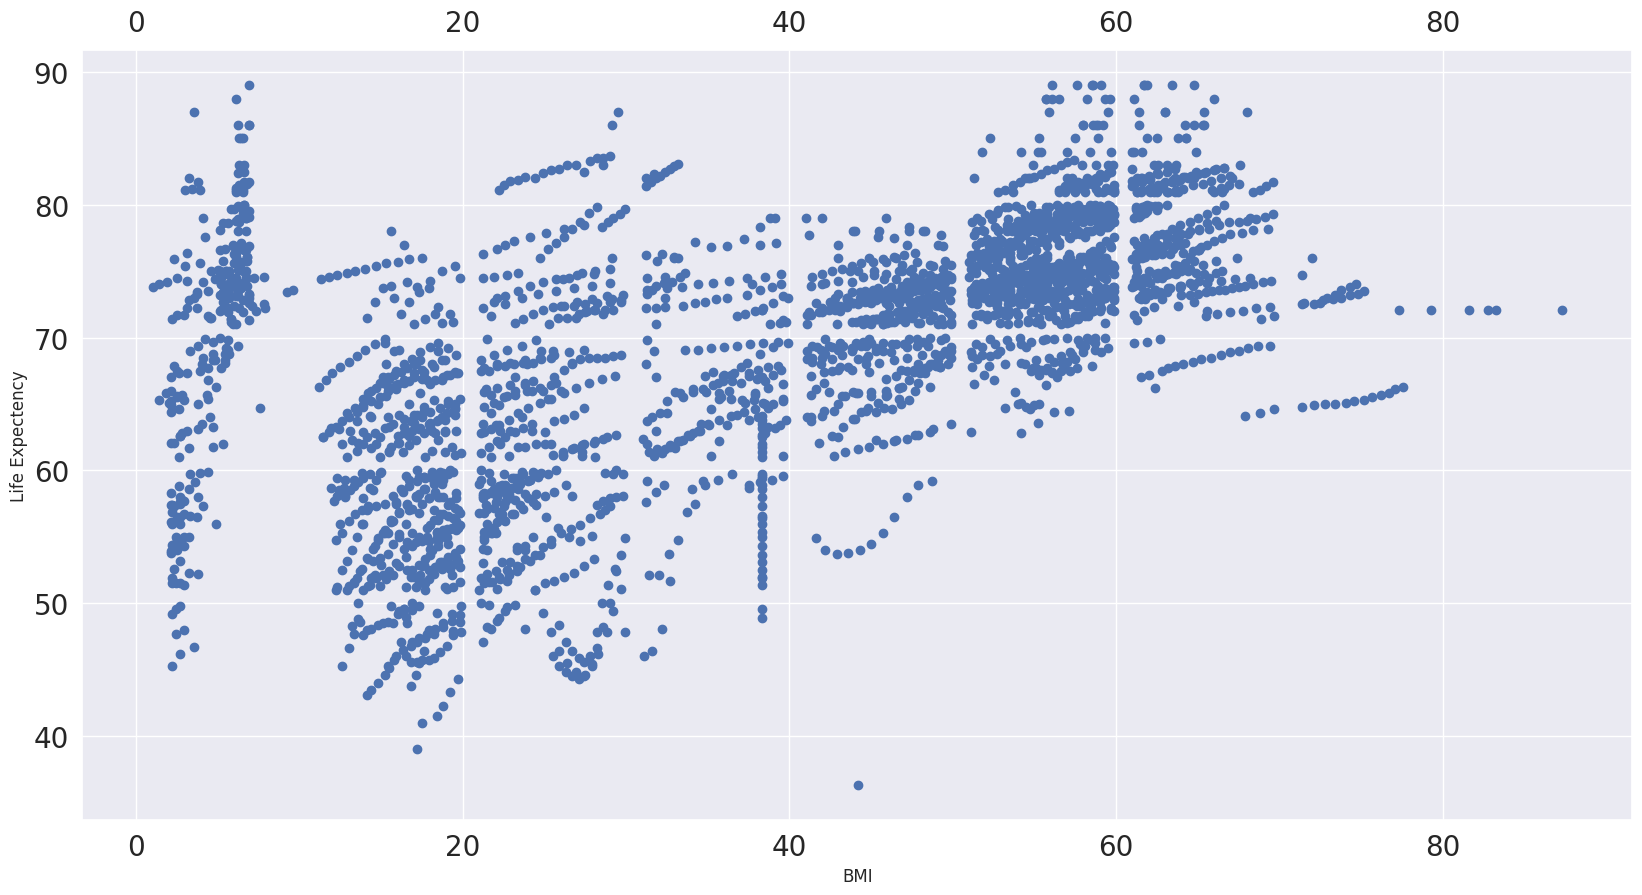

In [ ]:
sns.set(rc = {'figure.figsize':(20,10), 'font.weight': 'regular', 'font.size': 12, 'xtick.labelsize': 20, 'ytick.labelsize': 20})
plt.scatter(X['BMI'], X['Life_expectancy'])
plt.xlabel('BMI')
plt.ylabel('Life Expectency')

## **Preprocessing data**

In [ ]:
tim_data

0       19.1
1       18.6
2       18.1
3       17.6
4       17.2
        ... 
2933    27.1
2934    26.7
2935    26.3
2936    25.9
2937    25.5
Name: BMI, Length: 2938, dtype: float64

In [ ]:
def preprocess(X):
    return np.stack((np.ones(X.shape), X)).T

tim_data_ready = preprocess(tim_data.to_numpy())
tim_data_ready.shape

(2938, 2)

In [ ]:
tim_data_ready

array([[ 1. , 19.1],
       [ 1. , 18.6],
       [ 1. , 18.1],
       ...,
       [ 1. , 26.3],
       [ 1. , 25.9],
       [ 1. , 25.5]])

In [ ]:
def normal_equation(X,Y):
    return np.linalg.inv(X.T @ X) @ (X.T @ Y)

tim_theta = normal_equation(tim_data_ready, Y)
print(f'y = mx + b')
print(f'y = {tim_theta[1]}x + {tim_theta[0]}')

y = mx + b
y = 0.2674376847702379x + 58.986172038321655


Text(0, 0.5, 'Life Expectency')

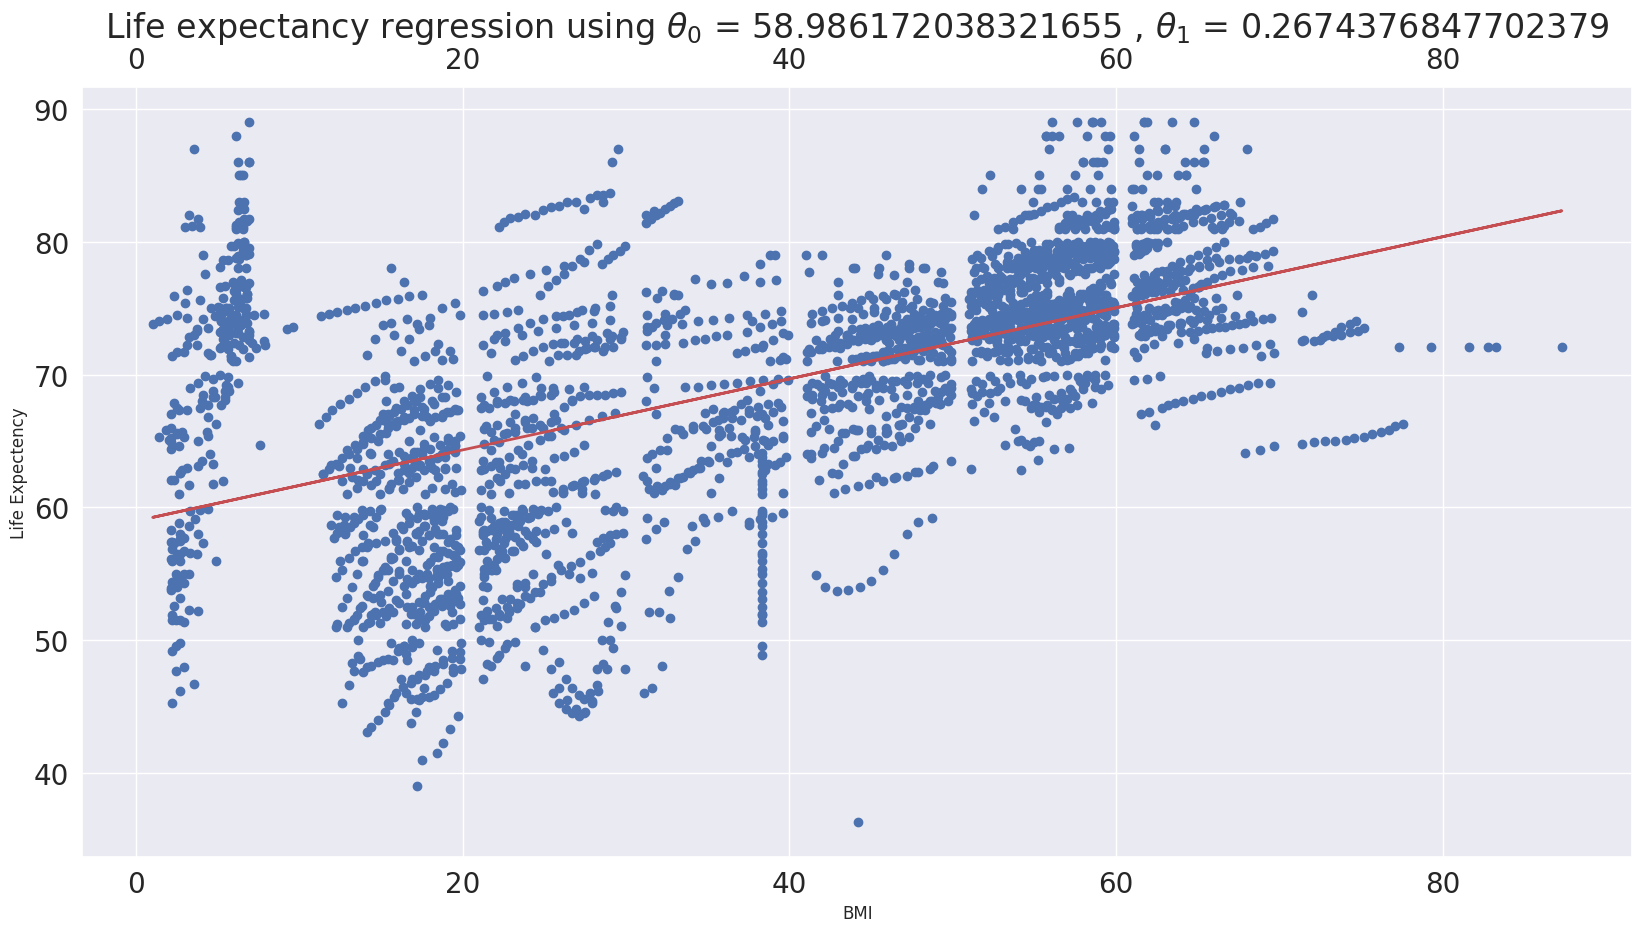

In [ ]:
plt.title('Life expectancy regression using $\\theta_0$ = {} , $\\theta_1$ = {}'.format(tim_theta[0], tim_theta[1]), fontsize=24)
plt.scatter(tim_data,Y, marker='o')
plt.plot(tim_data,np.dot(tim_data_ready, tim_theta), color='r', linewidth=2)
plt.xlabel('BMI')
plt.ylabel('Life Expectency')

In [ ]:
def life_expectancy(X, theta):
    return np.concatenate([[1], X]) @ theta

height = 1.82 #float(input("Please input your height (in meters): ")) #1.82
weight = 80 #float(input("Please input your weight (in kilograms): ")) #80
bmi = weight / height**2
print("BMI:", bmi)
life_exp_tim = life_expectancy([bmi], tim_theta)
print("Tim's life expectancy is", life_exp_tim.round(1) , "years.")

BMI: 24.151672503320853
Tim's life expectancy is 65.4 years.


In [ ]:
height = 1.80 #float(input("Please input your height (in meters): ")) #1.82
weight = 73 #float(input("Please input your weight (in kilograms): ")) #80
bmi = weight / height**2
print("BMI:",bmi)
life_exp_tim_tom = life_expectancy([bmi], tim_theta)
print("Tom's life expectancy predicted by Tim's model is", life_exp_tim_tom.round(1) , "years.")

BMI: 22.530864197530864
Tom's life expectancy predicted by Tim's model is 65.0 years.


# **Linear Regression with Tom**

In [ ]:
tom_data = X['GDP'].to_numpy()
tom_data

array([584.25921  , 612.696514 , 631.744976 , ...,  57.34834  ,
       548.587312 , 547.3588785])

## Visualzing Life expectancy vs GDP plot

Text(0, 0.5, 'Life expectancy')

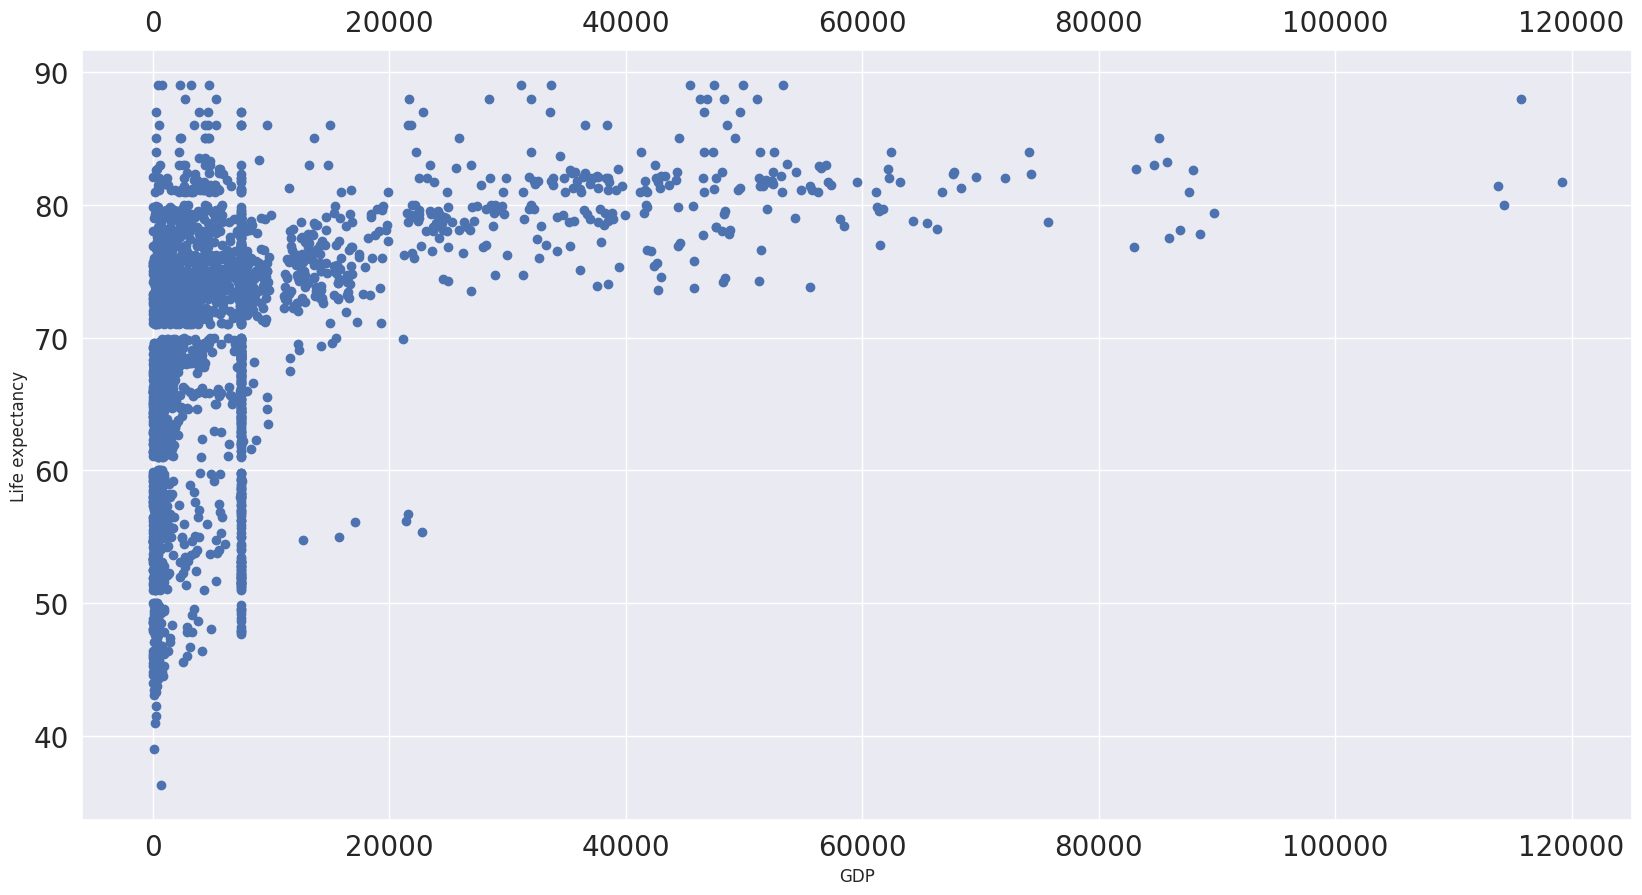

In [ ]:
plt.scatter(tom_data, Y)
plt.xlabel('GDP')
plt.ylabel('Life expectancy')

## **Preprocessing data**

In [ ]:
tom_data_ready = preprocess(tom_data)
tom_data_ready.shape

(2938, 2)

In [ ]:
tom_theta = normal_equation(tom_data_ready, Y)
print(f'y = mx + b')
print(f'y = {tom_theta[1]}x + {tom_theta[0]}')

y = mx + b
y = 0.0003114096238676796x + 66.90438993067784


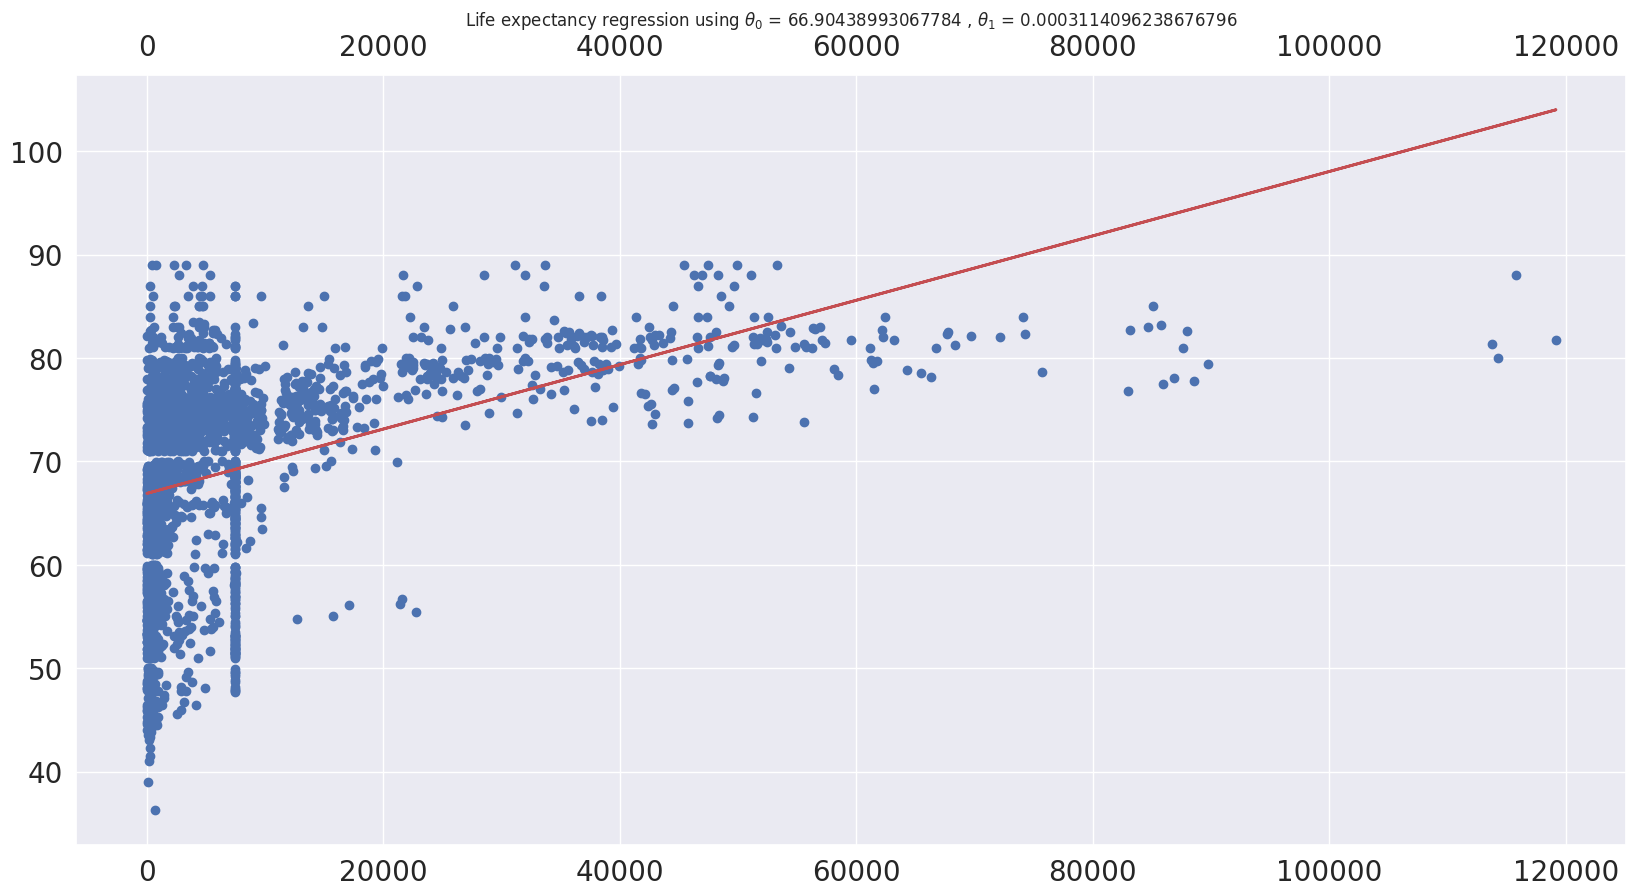

In [ ]:
plt.title('Life expectancy regression using $\\theta_0$ = {} , $\\theta_1$ = {}'.format(tom_theta[0], tom_theta[1]))
plt.scatter(tom_data,Y, marker='o')
plt.plot(tom_data,np.dot(tom_data_ready, tom_theta), color='r', linewidth=2)
plt.show()

In [ ]:
gdp = 8500 #float(input("Please input the GDP of your country: ")) #8500
life_exp_tom = life_expectancy([gdp], tom_theta)
print("Tom's life expectancy is", life_exp_tom , "years.")

Tom's life expectancy is 69.55137173355311 years.


In [ ]:
gdp = 5000 #float(input("Please input the GDP of your country: ")) #5000
life_exp_tom_tim = life_expectancy([gdp], tom_theta)
print("Tim's life expectancy predicted by Tom is", life_exp_tom_tim , "years.")

Tim's life expectancy predicted by Tom is 68.46143805001624 years.


# **Multiple Regression**

**x** - data \
**y** - label

If we have **n** datapoints, then our data and label matrix will look like this.

$ \underset{\left(m,n\right)}{X}=\begin{bmatrix}{\begin{matrix}1{\begin{matrix}\end{matrix}} & x_1^{\left(1\right)} & ... & x_{n}^{\left(1\right)}\\ 1 & x_1^{\left(2\right)} & ... & x_{n}^{\left(2\right)}\\ ... & ... & ... & ...\\ 1 & x_1^{\left(m\right)} & ... & x_{n}^{\left(m\right)}\end{matrix}}\end{bmatrix}, \underset{{\left(n,1\right)}}{y}=\begin{bmatrix}{y^{\left(1\right)}}\\ \begin{matrix}{\begin{matrix}{y^{\left(2\right)}}\\ ...\end{matrix}}\\ y^{\left(n\right)}\end{matrix}\end{bmatrix} $

We want to find $ \underset{\left(n,1\right)}{\theta}=\begin{bmatrix}{\theta}_0\\ \begin{matrix}{\theta_1}\\ ...\\ \theta_{n}\end{matrix}\end{bmatrix} $ for $ h(x) = \hat{y} = \theta x $

If we substitute our ***x*** and $\mathit{\mathbf{\theta}}$ in our hypothesis function we will get:

$ h(x)= \theta x$

In case of linear regression we can use the ***Normal Equation*** to calculate the optimal theta

$ \theta^*= (X^TX)^{-1}(X^TY) $

# **Multiple Regression with Tim**

In [ ]:
tim_data = X[['BMI', 'Adult_mortality', 'HIV/AIDS']]
tim_data.head()

,BMI,Adult_mortality,HIV/AIDS
0,19.1,263.0,0.1
1,18.6,271.0,0.1
2,18.1,268.0,0.1
3,17.6,272.0,0.1
4,17.2,275.0,0.1


In [ ]:
def add_ones(X):
    return np.concatenate([np.ones((X.shape[0], 1)),  X], axis=1)

tim_data_ready = add_ones(tim_data.to_numpy())
tim_data_ready.shape

(2938, 4)

In [ ]:
tim_theta = normal_equation(tim_data_ready, Y)
print(f'theta = {tim_theta}')

theta = [ 6.95250308e+01  1.58686254e-01 -3.38199840e-02 -4.58041192e-01]


In [ ]:
def RMSE(y_pred, y):
    return np.sqrt(metrics.mean_squared_error(y, y_pred))

tim_y_pred = np.dot(tim_data_ready, tim_theta)
tim_rmse = RMSE(tim_y_pred, Y)

print("Tim's RMSE: ", tim_rmse)

Tim's RMSE:  5.784750918898876


In [ ]:
height = 1.82 #float(input("Please input your height (in meters): "))
weight = 80 #float(input("Please input your weight (in kilograms): "))
bmi = weight / height**2
adult_mortality = 53
hiv = 0.1
life_exp_tim = life_expectancy([bmi,adult_mortality,hiv], tim_theta)
print("Tim's life expectancy is", life_exp_tim .round(1), "years.")

Tim's life expectancy is 71.5 years.


In [ ]:
height = 1.80 #float(input("Please input your height (in meters): "))
weight = 73 #float(input("Please input your weight (in kilograms): "))
bmi = weight / height**2
adult_mortality = 70
hiv = 0.1
life_exp_tim_tom = life_expectancy([bmi,adult_mortality,hiv], tim_theta)
print("Tom's life expectancy predicted by Tim is", life_exp_tim_tom.round(1) , "years.")

Tom's life expectancy predicted by Tim is 70.7 years.


# **Multiple Regression with Tom**

In [ ]:
tom_data = X[['GDP', 'Income_composition_of_resources', 'Schooling']]
tom_data.head()

,GDP,Income_composition_of_resources,Schooling
0,584.259210,0.479,10.1
1,612.696514,0.476,10.0
2,631.744976,0.470,9.9
3,669.959000,0.463,9.8
4,63.537231,0.454,9.5


In [ ]:
tom_data_ready = add_ones(tom_data)
tom_data_ready.shape

(2938, 4)

In [ ]:
tom_theta = normal_equation(tom_data_ready, Y)
print(f'theta = {tom_theta}')

theta = [4.49681347e+01 8.26882411e-05 1.42744076e+01 1.22489350e+00]


In [ ]:
def RMSE(y_pred, y):
    return np.sqrt(metrics.mean_squared_error(y, y_pred))

tom_y_pred = np.dot(tom_data_ready, tom_theta)
tom_rmse = RMSE(tom_y_pred, Y)

print("Tom's RMSE: ", tom_rmse)

Tom's RMSE:  6.288890108092894


In [ ]:
gdp = 8500
income = 0.8
school = 16.5
life_exp_tom = life_expectancy([gdp,income,school], tom_theta)
print("Tom's life expectancy is", life_exp_tom.round(1) , "years.")

Tom's life expectancy is 77.3 years.


In [ ]:
gdp = 5000
income = 0.77
school = 15.5
life_exp_tom_tim = life_expectancy([gdp,income,school], tom_theta)
print("Tim's life expectancy predicted by Tom is", life_exp_tom_tim.round(1) , "years.")

Tim's life expectancy predicted by Tom is 75.4 years.


# **Solving the problem using a Deep Neural Network**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

## **Preprocessing**

### **Selecting features**

Let's select those features whose positive correlation is >0.4 and negative correlation < -0.5.

In [ ]:
correlation = life_exp.corr()
correlation

In [ ]:
filtered = correlation['Life_expectancy']
filtered

Year                               0.170819
Life_expectancy                    1.000000
Adult_mortality                   -0.696251
Infant_deaths                     -0.196769
Alcohol                            0.390675
Percentage_expenditure             0.381418
HepatitisB                         0.203519
Measles                           -0.157767
BMI                                0.560453
Under_five_deaths                 -0.222738
Polio                              0.461526
Total_expenditure                  0.208879
Diphtheria                         0.475378
HIV/AIDS                          -0.556703
GDP                                0.430211
Population                        -0.019683
 thinness  1-19 years             -0.472829
 thinness 5-9 years               -0.467295
Income_composition_of_resources    0.692560
Schooling                          0.714358
Name: Life_expectancy, dtype: float64

In [ ]:
columns = filtered.index.values
columns

array(['Year', 'Life_expectancy', 'Adult_mortality', 'Infant_deaths',
       'Alcohol', 'Percentage_expenditure', 'HepatitisB', 'Measles',
       'BMI', 'Under_five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income_composition_of_resources', 'Schooling'], dtype=object)

In [ ]:
mask = (filtered < -0.5) | (filtered > 0.4)
mask

Year                               False
Life_expectancy                     True
Adult_mortality                     True
Infant_deaths                      False
Alcohol                            False
Percentage_expenditure             False
HepatitisB                         False
Measles                            False
BMI                                 True
Under_five_deaths                  False
Polio                               True
Total_expenditure                  False
Diphtheria                          True
HIV/AIDS                            True
GDP                                 True
Population                         False
 thinness  1-19 years              False
 thinness 5-9 years                False
Income_composition_of_resources     True
Schooling                           True
Name: Life_expectancy, dtype: bool

In [ ]:
filtered_columns = columns[mask][1:]
filtered_columns

array(['Adult_mortality', 'BMI', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP',
       'Income_composition_of_resources', 'Schooling'], dtype=object)

In [ ]:
X = life_exp[filtered_columns]
X.head()

,Adult_mortality,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Income_composition_of_resources,Schooling
0,263.0,19.1,6.0,65.0,0.1,584.259210,0.479,10.1
1,271.0,18.6,58.0,62.0,0.1,612.696514,0.476,10.0
2,268.0,18.1,62.0,64.0,0.1,631.744976,0.470,9.9
3,272.0,17.6,67.0,67.0,0.1,669.959000,0.463,9.8
4,275.0,17.2,68.0,68.0,0.1,63.537231,0.454,9.5


In [ ]:
X.describe()

,Adult_mortality,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,164.796448,38.321247,82.550188,82.324084,1.742103,7483.158469,0.627551,11.992793
std,124.080302,19.927677,23.352143,23.640073,5.077785,13136.800417,0.204820,3.264381
min,1.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.000000,0.000000
25%,74.000000,19.400000,78.000000,78.000000,0.100000,580.486996,0.504250,10.300000
50%,144.000000,43.000000,93.000000,93.000000,0.100000,3116.561755,0.662000,12.100000
75%,227.000000,56.100000,97.000000,97.000000,0.800000,7483.158469,0.772000,14.100000
max,723.000000,87.300000,99.000000,99.000000,50.600000,119172.741800,0.948000,20.700000


In [ ]:
Y = life_exp['Life_expectancy']
Y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life_expectancy, dtype: float64

In [ ]:
X.shape, Y.shape

((2938, 8), (2938,))

In [ ]:
X = X.to_numpy()
Y = Y.to_numpy()

### **Normalizing values**

In [ ]:
def standardize(X):
    mu = X.mean()
    sigma = X.std()
    normalized = ( X - mu ) / sigma
    return normalized, mu, sigma

In [ ]:
x_norm, mu, sigma = standardize(X)

### **Shuffling and splitting the dataset**

Use a train:validation:test split ration of 6:2:2

In [ ]:
dataset = np.concatenate((x_norm, Y[:,None]), axis=1)
dataset.shape

(2938, 9)

In [ ]:
from sklearn.model_selection import train_test_split

# implement your solution BELOW
data_train, rest = train_test_split(dataset, train_size=0.6, shuffle=True)
data_val, data_test = train_test_split(rest, train_size=0.5)

print((data_train.shape, data_val.shape, data_test.shape))

((1762, 9), (588, 9), (588, 9))


In [ ]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):

    def __init__(self, dataset):
        self.features = torch.from_numpy(dataset[:,:-1]).float()
        self.labels = torch.from_numpy(dataset[:,-1]).float().unsqueeze(1)

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, idx):
        return self.features[idx, :], self.labels[idx]


train_dataset = CustomDataset(data_train)
val_dataset = CustomDataset(data_val)
test_dataset = CustomDataset(data_test)

dataloader_train = DataLoader(train_dataset, batch_size=32, shuffle=True)
dataloader_val = DataLoader(val_dataset, batch_size=32, shuffle=True)
dataloader_test = DataLoader(test_dataset, batch_size=32, shuffle=False)


## **Defining DataLoader and Model**

In [ ]:
# implement your solution BELOW
class CustomModel(nn.Module):
    def __init__(self, in_features):
        super(CustomModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, 20),
            nn.ReLU(),
            nn.Linear(20, 1)
        )

    def forward(self, X):
        return self.model(X)

Epoch 0/200, Train Loss: 6102.595703125, Val Loss: 4953.0283203125
Epoch 10/200, Train Loss: 2862.83837890625, Val Loss: 2111.593505859375
Epoch 20/200, Train Loss: 636.7042236328125, Val Loss: 320.8240051269531
Epoch 30/200, Train Loss: 59.794063568115234, Val Loss: 58.6087760925293
Epoch 40/200, Train Loss: 58.898460388183594, Val Loss: 40.4240608215332
Epoch 50/200, Train Loss: 69.2608413696289, Val Loss: 56.9272575378418
Epoch 60/200, Train Loss: 38.48622131347656, Val Loss: 22.441946029663086
Epoch 70/200, Train Loss: 18.650909423828125, Val Loss: 72.29264831542969
Epoch 80/200, Train Loss: 37.32881546020508, Val Loss: 53.0180549621582
Epoch 90/200, Train Loss: 118.40205383300781, Val Loss: 57.76023864746094
Epoch 100/200, Train Loss: 30.945518493652344, Val Loss: 86.01058197021484
Epoch 110/200, Train Loss: 9.037251472473145, Val Loss: 36.997135162353516
Epoch 120/200, Train Loss: 15.778244972229004, Val Loss: 23.378000259399414
Epoch 130/200, Train Loss: 3.8428943157196045, Val 

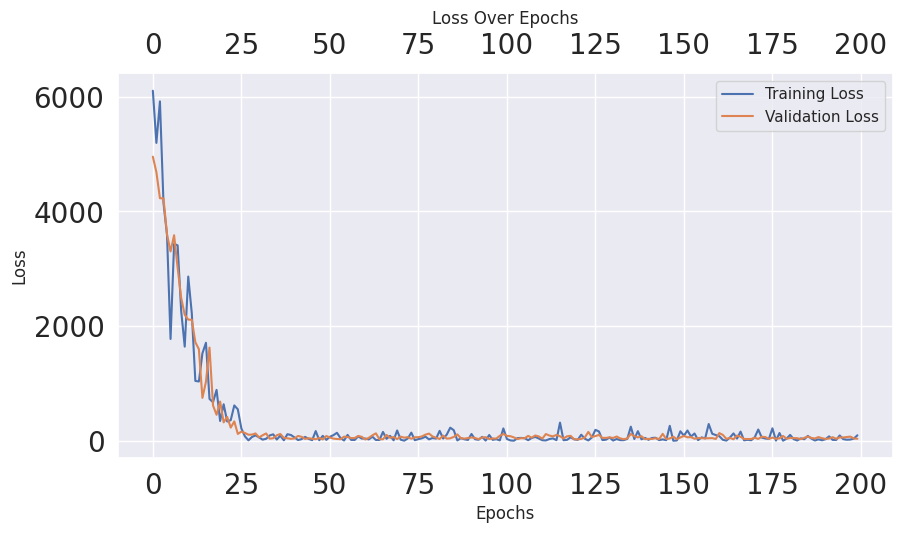

In [ ]:
model = CustomModel(in_features=8)
lossfn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with early stopping
num_epochs = 200
patience = 20
best_val_loss = float('inf')
patience_counter = 0
best_model_wts = None

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    for x, y in dataloader_train:
    # Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(x)
        loss = lossfn(outputs, y)
        loss.backward()
        optimizer.step()

    train_losses.append(loss.mean().item())

    # Validation phase
    model.eval()
    with torch.no_grad():
        for x, y in dataloader_val:
            val_outputs = model(x)
            val_loss = lossfn(val_outputs, y)

    val_losses.append(val_loss.mean().item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{num_epochs}, Train Loss: {loss.item()}, Val Loss: {val_loss.item()}")
    best_model_wts = model.state_dict()

# Load the best model weights (if saved)

# Plotting the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

best_model = model.load_state_dict(best_model_wts)

### **Make a prediction for Tim and Tom:**

## Tim:
Adult Mortality: 53 \
BMI = 24.2 \
Polio: 98 \
Difteria: 98 \
HIV: 0.1 \
GDP = 5000 \
Income = 0.77 \
School = 15.5

### Tom:
Adult Mortality: 70 \
BMI = 22.5 \
Polio: 97 \
Difteria: 97 \
HIV: 0.1 \
GDP = 8500 \
Income = 0.8 \
School = 16.5

In [ ]:
tim = [53, 24.2, 98, 98, 0.1, 5000, 0.77, 15.5]
tom = [70, 22.5, 97, 97, 0.1, 8500, 0.8, 16.5]

## **Standardizing the inputs and running a prediction**

In [ ]:
tim_std = (tim - mu) / sigma
tom_std = (tom - mu) / sigma
(tim_std, tom_std)

(array([-0.17704225, -0.18252374, -0.16847743, -0.16847743, -0.18711067,
         0.76451685, -0.18698315, -0.1841796 ]),
 array([-0.17380666, -0.1828473 , -0.16866776, -0.16866776, -0.18711067,
         1.43066945, -0.18697744, -0.18398927]))

In [ ]:
with torch.no_grad():
    life_exp_tim = model(torch.Tensor(tim_std))

print(f'Tim\'s life expectancy is {life_exp_tim.numpy().round(2)} years')

Tim's life expectancy is [72.92] years


In [ ]:
with torch.no_grad():
    life_exp_tim = model(torch.Tensor(tom_std))

print(f'Tom\'s life expectancy is {life_exp_tim.numpy().round(2)} years')

Tom's life expectancy is [73.29] years


## **Implement Early Stopping**

In [ ]:
model = CustomModel(in_features=8)
lossfn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with early stopping
num_epochs = 200
patience = 20
best_val_loss = float('inf')
patience_counter = 0
best_model_wts = None

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    for x, y in dataloader_train:
    # Training phase
        model.train()
        optimizer.zero_grad()
        outputs = model(x)
        loss = lossfn(outputs, y)
        loss.backward()
        optimizer.step()

    train_losses.append(loss.mean().item())

    # Validation phase
    model.eval()
    with torch.no_grad():
        for x, y in dataloader_val:
            val_outputs = model(x)
            val_loss = lossfn(val_outputs, y)

    val_losses.append(val_loss.mean().item())

    # Check early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        # Save the best model (optional)
        best_model_wts = model.state_dict()
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{num_epochs}, Train Loss: {loss.item()}, Val Loss: {val_loss.item()}")

# Load the best model weights (if saved)

# Plotting the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

best_model = model.load_state_dict(best_model_wts)

### **HOMEWORK (Optional)**

- **Exercise 1: Feature Selection and Model Improvement**  
  Use feature selection techniques (e.g., correlation analysis or Lasso regression) on the life expectancy dataset to identify the most predictive features. Then, build a regression model using only these selected features and compare its performance (e.g., RMSE) with that of a model built using all features.

- **Exercise 2: Impact of Data Normalization**  
  Experiment with different data normalization techniques (e.g., standardization versus min-max scaling) on the life expectancy dataset. Train the neural network model using each normalization method, compare the results, and analyze how the choice of normalization affects model convergence and accuracy.

- **Exercise 3: Hyperparameter Tuning for Neural Networks**  
  Perform hyperparameter tuning on your neural network model by varying parameters such as learning rate, number of hidden units, number of layers, dropout rate, and batch size. Report the configuration that yields the best validation performance and explain your findings.

- **Exercise 4: Residual Analysis**  
  After training your regression models, conduct a residual analysis by plotting the residuals (the differences between actual and predicted life expectancy) against the predicted values. Interpret the plots to identify any patterns or biases and suggest improvements based on your observations.